# Data Visualization

Purpose:
	•	To see patterns and relationships visually that may not be obvious from raw numbers.
	•	Makes findings easier to communicate to others.
	•	Helps in identifying trends, comparisons, and outliers effectively.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load cleaned data
df = pd.read_csv("data/processed/student_performance_cleaned.csv")

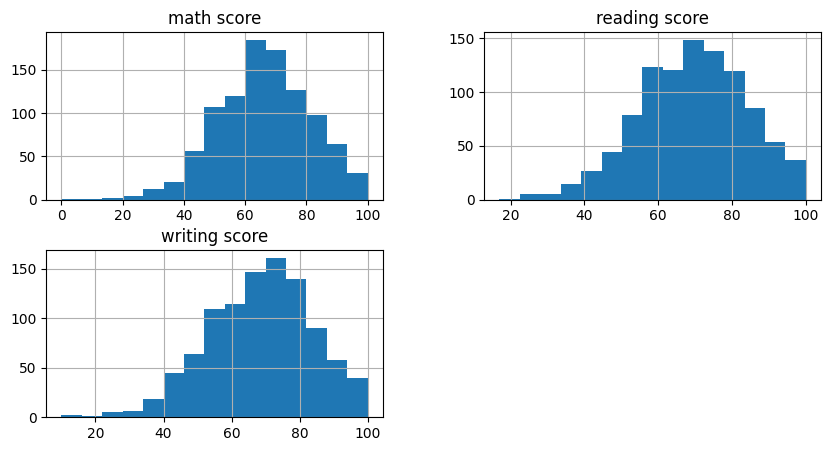

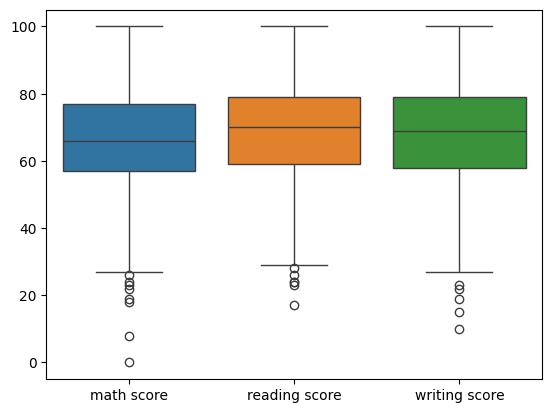

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of all scores
df[['math score','reading score','writing score']].hist(bins=15, figsize=(10,5))
plt.savefig("../outputs/Histogram_of_all_scores.png", bbox_inches='tight')
plt.show()

# Boxplot to check for outliers
sns.boxplot(data=df[['math score','reading score','writing score']])
# save automatically to outputs/figures
plt.savefig("../outputs/Boxplot.png", bbox_inches='tight')
plt.show()

## Key Findings
# Distribution Overview
Distribution Overview (Histograms)
•⁠  ⁠Math Score: Displays a slightly right-skewed distribution. There is a sharper peak around the 65–70 range with a quicker drop-off toward higher scores compared to the other subjects.
•⁠  ⁠Reading & Writing Scores: Both show a more symmetrical, bell-shaped distribution (normal distribution). Most students score between 60 and 80.
•⁠  ⁠General Trend: Most students across all categories are performing in the "average" range (60–80), with very few students scoring below 20 or achieving a perfect 100.


# Distribution Overview
Comparative Performance (Box Plots)
•⁠  ⁠Medians: The median scores for Reading (Orange) and Writing (Green) are nearly identical and slightly higher than the median for Math (Blue).
•⁠  ⁠Spread (IQR): The "boxes" (representing the middle 50% of students) are very similar in size, suggesting consistent variability across all three subjects.
•⁠  ⁠Outliers: All three subjects have low-end outliers (students scoring significantly below the rest of the group, roughly below 30). Math appears to have the most distinct individual outliers at the bottom of the scale.

gender
female    518
male      482
Name: count, dtype: int64


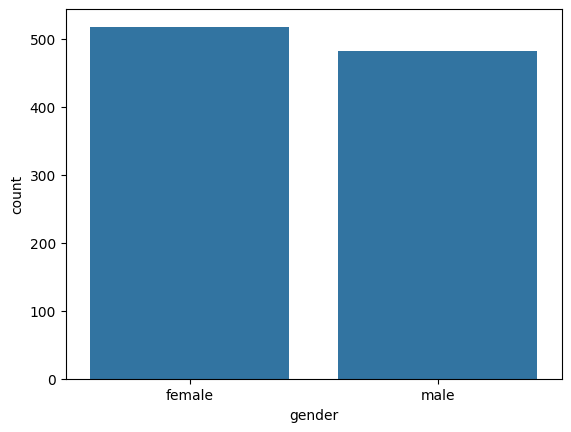

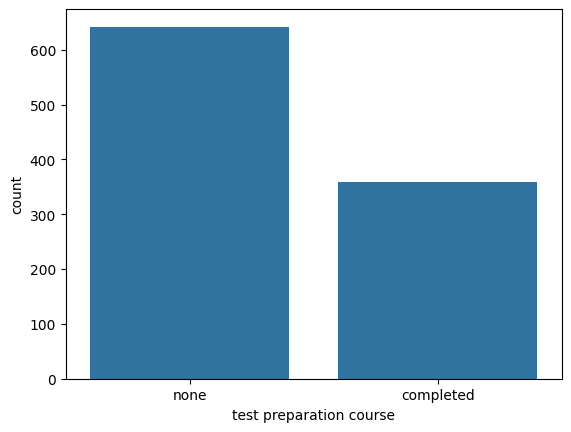

In [10]:
# Count of each gender
print(df['gender'].value_counts())

# Countplot for categorical columns
sns.countplot(x='gender', data=df)
plt.show()

sns.countplot(x='test preparation course', data=df)
plt.savefig("../outputs/Count_plot.png", bbox_inches='tight')
plt.show()

# Demographic Distribution (Count Plots)
•⁠  ⁠Gender: The dataset is nearly balanced, with a slightly higher count of females (approx. 500+) compared to males (approx. 480).
•⁠  ⁠Course Completion: A significant majority of students (over 600) did not complete a test preparation course, while only about 350 completed it.

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


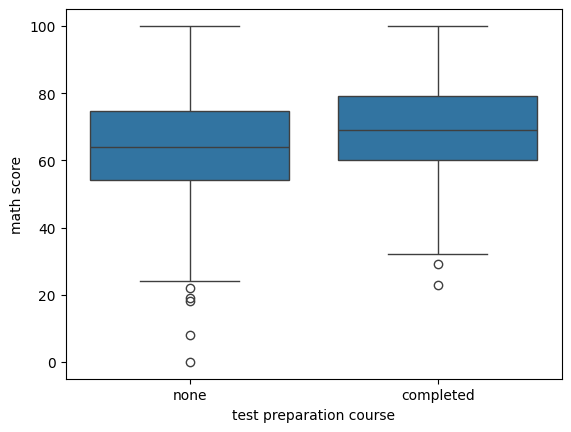

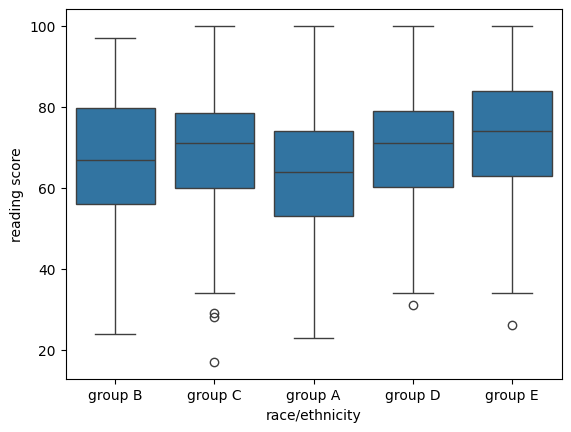

In [11]:
# Average scores by gender
print(df.groupby('gender')[['math score','reading score','writing score']].mean())

# Boxplot of scores by test prep
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.show()

sns.boxplot(x='race/ethnicity', y='reading score', data=df)
plt.savefig("../outputs/Boxplot_of_all_scores.png", bbox_inches='tight')
plt.show()

# Performance Factors (Box Plots)
•⁠  ⁠Test Preparation: Students who "completed" the course have a noticeably higher median math score and fewer extreme low-end outliers than those who did "none".
•⁠  ⁠Race/Ethnicity: Group E shows the highest median reading scores, while Group A generally shows the lowest. Groups B, C, and D perform at similar mid-ranges.


               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


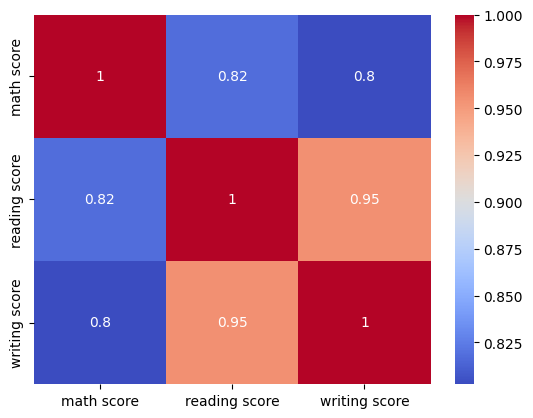

In [12]:
# Correlation matrix
corr = df[['math score','reading score','writing score']].corr()
print(corr)

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig("../outputs/Heatmap.png", bbox_inches='tight')
plt.show()

# Core Interpretations of Correlation Heatmap
•⁠  ⁠Strong Positive Correlation: All variables show a very high positive correlation (above 0.80), meaning as a student's score in one subject increases, it is highly likely to increase in the others as well.
•⁠  ⁠Reading & Writing (Highest Link): The strongest relationship is between reading and writing (0.95). This suggests that the skills required for these two subjects are almost identical in this dataset.
•⁠  ⁠Math Correlation: Math has a slightly lower correlation with reading (0.82) and writing (0.80). While still very strong, it indicates that math performance is somewhat more independent than the literacy-based subjects.

# Key Finding
Test preparation and literacy skills are the primary drivers of success in this dataset. Students who completed a preparation course showed significantly higher median scores and fewer failing outliers. Furthermore, reading and writing performance are almost perfectly correlated (0.95), suggesting they rely on nearly identical skill sets.


# Conclusion
While the student population is demographically balanced by gender, there is a significant performance gap tied to course completion and ethnicity. To improve overall outcomes, intervention should focus on increasing participation in prep courses and addressing the lower performance trends observed in specific ethnic groups.